In [1]:
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
GPTFILE = """
# Start divergent electron beam polarised in the x-direction
gs = 2.00231930436256 ;
GBz = 2.0 ;
pr = 0.1 ;
setparticles("beam",1000,me,qe,0,gs) ;
setGBrxydist("beam","u",pr/2,pr) ;
setGBphidist("beam","u",0,2*pi) ;
setGBzdist("beam","u",GBz,0) ;
setspinxdist("beam","u",1,0) ;

# Set-up
nI = 6600 ;
radius = 0.1 ;
solenoid("wcs","z",0.5, radius,nI) ;

# Tracking and output
accuracy(5,5,6) ;
tout(0,1.2/c,0.01/c) ;
#screen("wcs","I",1) ;

# Estimated spin-rotation
pp("Estimated spin rotation:", -(qe/(me*c*GBz)) * mu0*nI , "radians") ;

"""

In [3]:
with open('gptspin.in', 'w') as fid:
    fid.write(GPTFILE)
    

In [4]:
from gpt import GPT

In [5]:
G = GPT('gptspin.in', spin_tracking=True)

In [6]:
G.run()

In [7]:
G.tout_stat('spin_polarization')

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999999,
       0.99999999, 0.99999999, 0.99999998, 0.99999997, 0.99999996,
       0.99999995, 0.99999993, 0.9999999 , 0.99999986, 0.99999981,
       0.99999973, 0.99999964, 0.9999995 , 0.99999932, 0.99999907,
       0.99999873, 0.99999827, 0.99999763, 0.99999676, 0.99999556,
       0.99999391, 0.99999161, 0.99998843, 0.999984  , 0.99997781,
       0.99996914, 0.99995701, 0.99994   , 0.99991618, 0.99988294,
       0.99983678, 0.99977329, 0.99968715, 0.99957261, 0.99942447,
       0.99924013, 0.99902241, 0.99878288, 0.99854396, 0.99833747,
       0.99819774, 0.99815043, 0.9982021 , 0.99833701, 0.99852335,
       0.99872507, 0.99891261, 0.99906807, 0.99918494, 0.99926482,
       0.99931362, 0.9993386 , 0.99934663, 0.99934341, 0.99933328,
       0.99931934, 0.9993037 , 0.99928773, 0.99927227, 0.99925

Text(0, 0.5, 'Polarization')

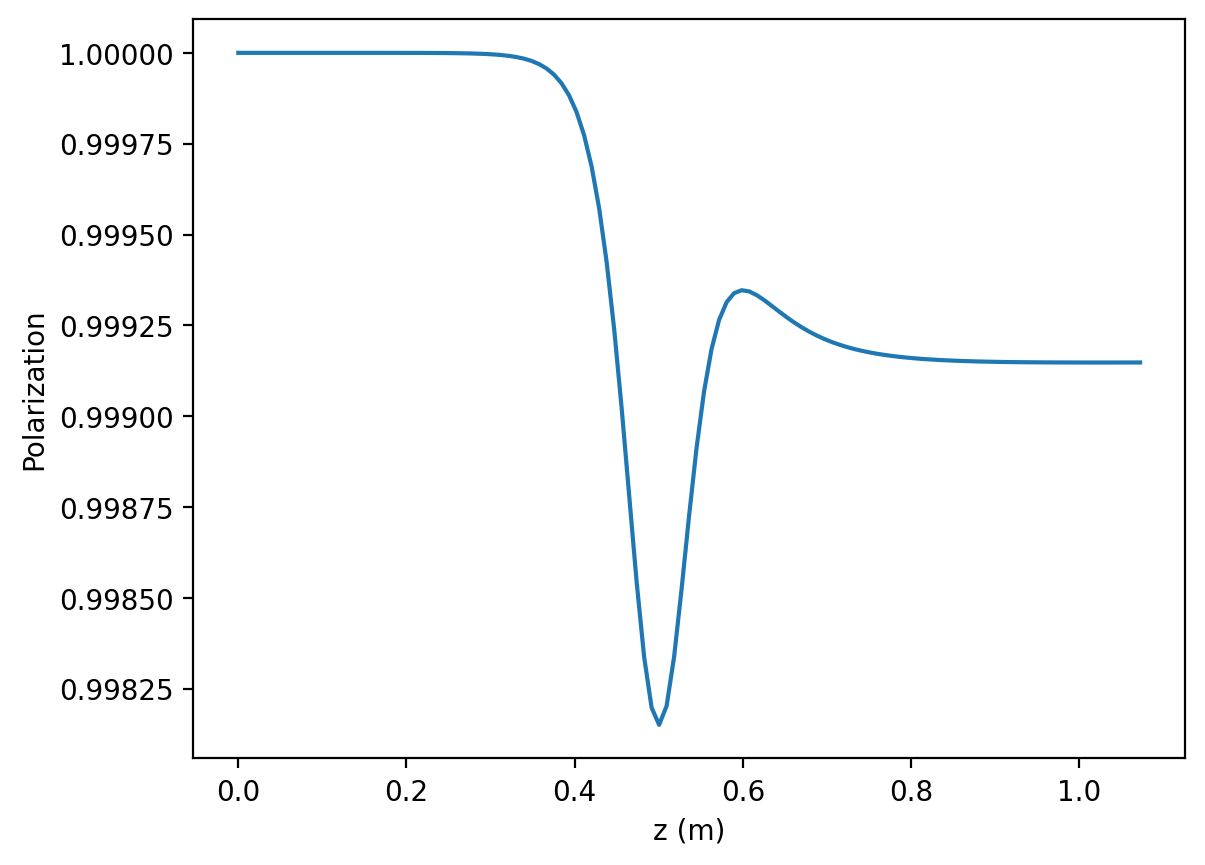

In [21]:
plt.plot(G.tout_stat('mean_z'), G.tout_stat('spin_polarization'))
plt.xlabel('z (m)')
plt.ylabel('Polarization')

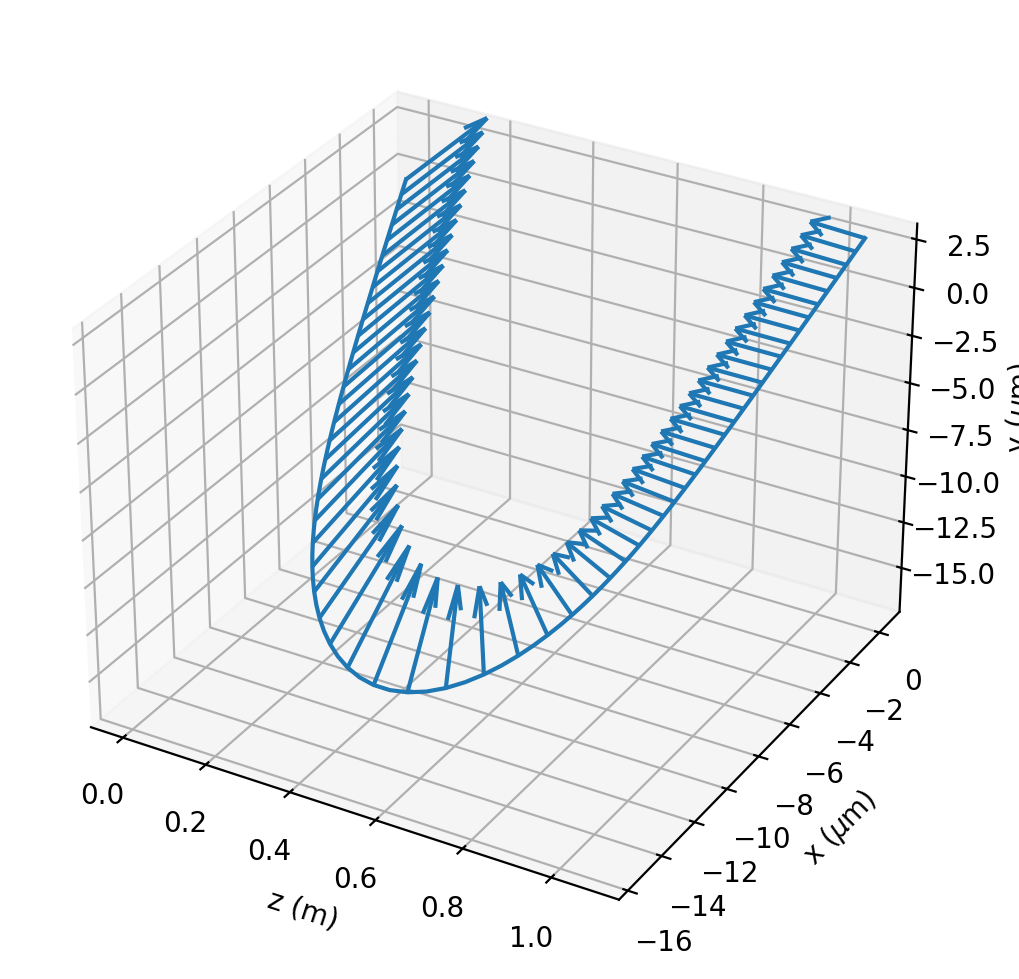

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#soa = np.array([[0, 0, 1, 1, -2, 0], [0, 0, 2, 1, 1, 0],
#                [0, 0, 3, 2, 1, 0], [0, 0, 4, 0.5, 0.7, 0]])

#X, Y, Z, U, V, W = zip(*soa)

X, Y, Z = G.tout_stat('mean_x'), G.tout_stat('mean_y'), G.tout_stat('mean_z')

f = 5

n = 2

SX, SY, SZ = G.tout_stat('mean_sx'), G.tout_stat('mean_sy'), G.tout_stat('mean_sz')

fig = plt.figure(figsize=(5, 15))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(Z[::n], X[::n]*1e6, Y[::n]*1e6, f*SZ[::n], f*SX[::n], f*SY[::n])
ax.plot(Z, X*1e6, Y*1e6)

ax.set_xlabel('z (m)')
ax.set_ylabel(r'x ($\mu$m)')
ax.set_zlabel(r'y ($\mu$m)')

plt.tight_layout()


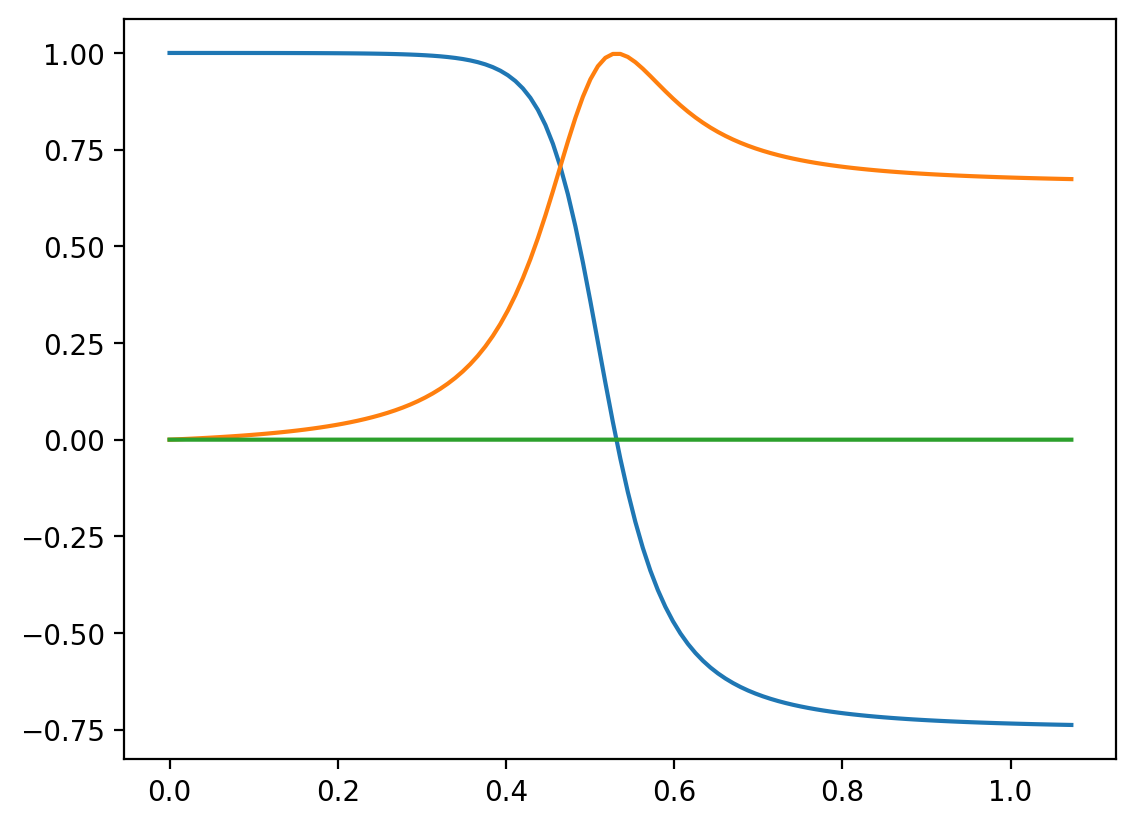

In [10]:
plt.plot(G.tout_stat('mean_z'), G.tout_stat('mean_sx'))
plt.plot(G.tout_stat('mean_z'), G.tout_stat('mean_sy'))
plt.plot(G.tout_stat('mean_z'), G.tout_stat('mean_sz'))

Text(0, 0.5, '$<S_y>$')

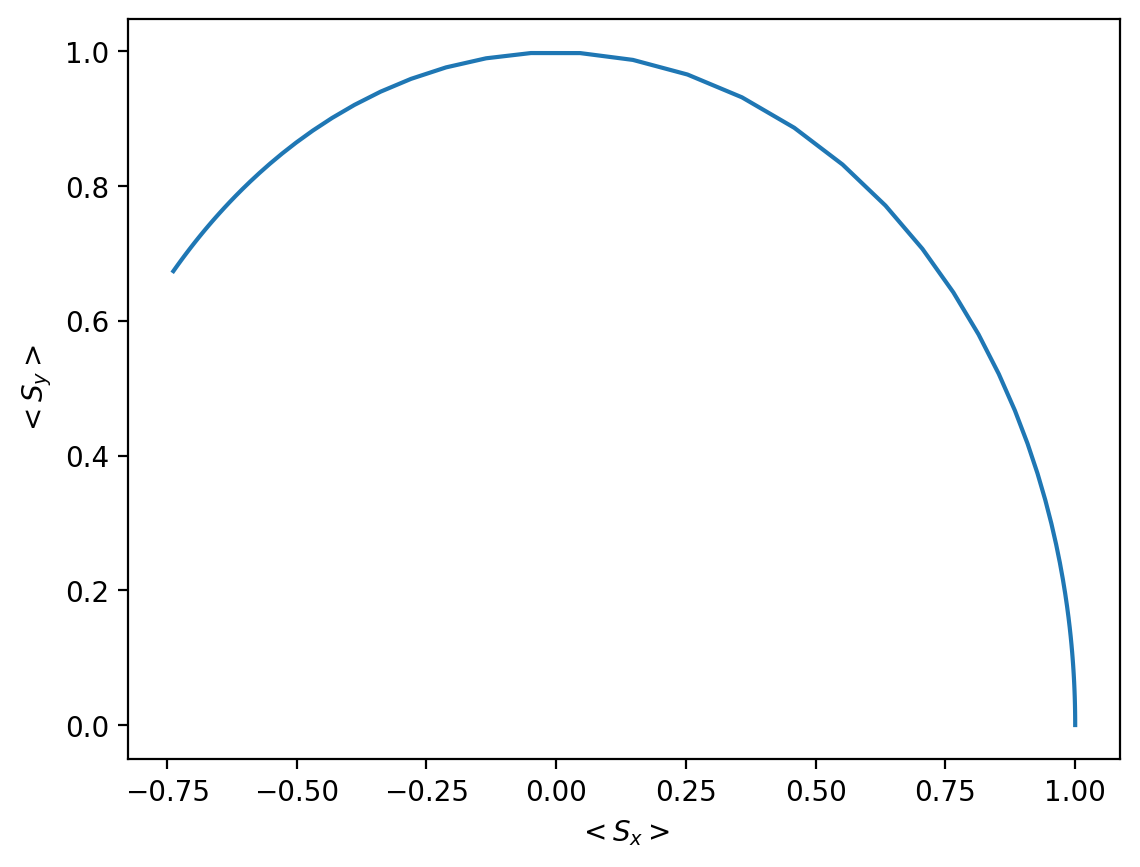

In [11]:
plt.plot(G.tout_stat('mean_sx'), G.tout_stat('mean_sy'))
plt.xlabel(r'$<S_x>$')
plt.ylabel(r'$<S_y>$')

Text(0, 0.5, '$\\sqrt{\\sigma_{s_x}^2+\\sigma_{s_y}^2 + \\sigma_{s_z}^2}$')

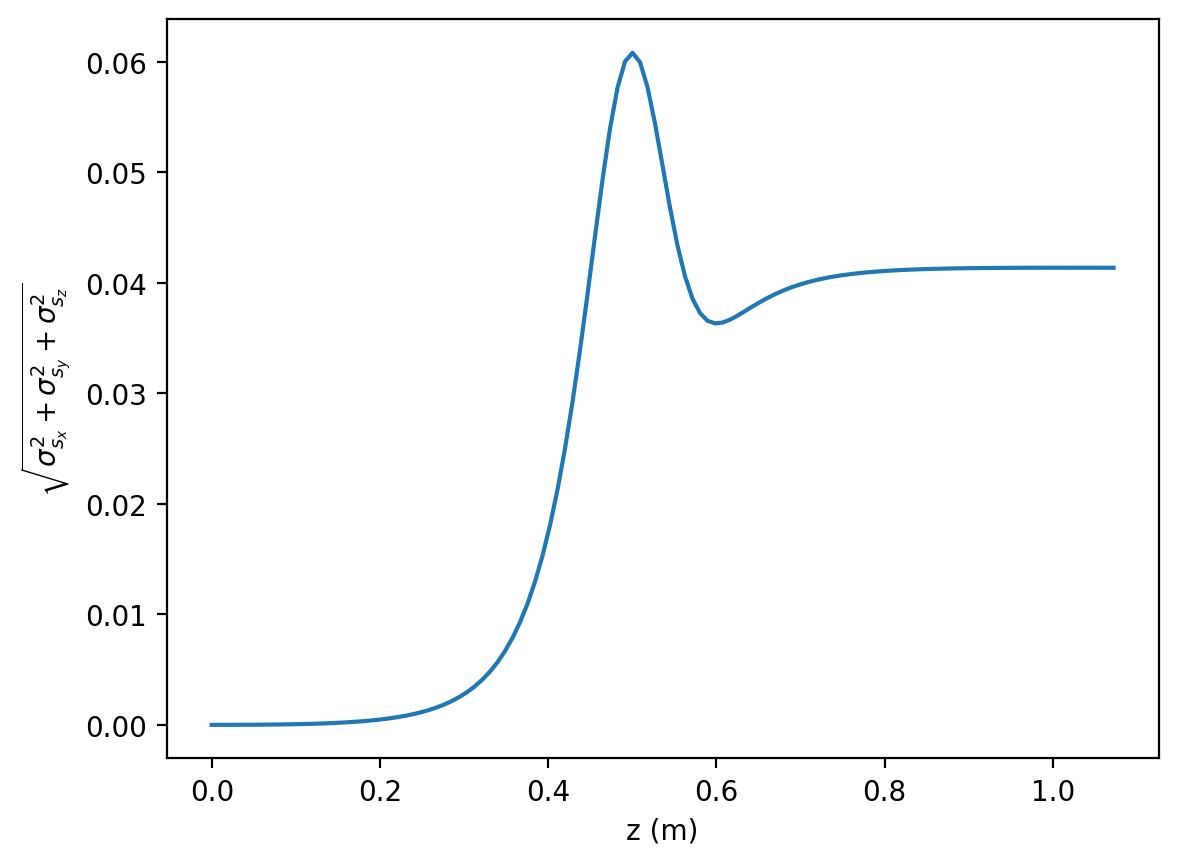

In [20]:
stds = np.sqrt(G.tout_stat('sigma_sx')**2 + G.tout_stat('sigma_sy')**2 + G.tout_stat('sigma_sx')**2 + G.tout_stat('sigma_sz')**2)

plt.plot(G.tout_stat('mean_z'), stds)


plt.xlabel('z (m)')
plt.ylabel(r'$\sqrt{\sigma_{s_x}^2+\sigma_{s_y}^2 + \sigma_{s_z}^2}$')

In [13]:
import os 

os.remove('gptspin.in')